In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 20})
import math

import seaborn as sns

import os

In [2]:
abs_path = os.path.join('~', 'Development', 'kaggle_data', 'google-play-store-apps')

store_data = os.path.join(abs_path, 'googleplaystore.csv')

df_store = pd.read_csv(store_data)


In [3]:
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
len(df_store)

10841

In [5]:
print(df_store.columns)
print(len(df_store.columns))

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
13


In [6]:
df_store.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
df_store.dropna(axis=0, how='any', subset=['Type', 'Content Rating', 'Current Ver', 'Android Ver'], inplace=True)
df_store.isna().sum()

App                  0
Category             0
Rating            1469
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

 #어플리케이션 타입에 따른 데이터 분석

In [23]:
print(df_store['Type'].unique())

['Free' 'Paid']


Number of Free Apps: 10032
Number of Paid Apps: 797


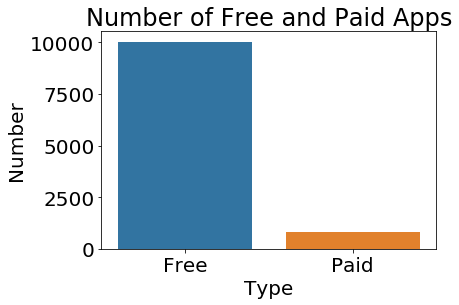

In [36]:
ax = sns.countplot(x='Type', data=df_store)
plt.xlabel('Type')
plt.ylabel('Number')
plt.title('Number of Free and Paid Apps')

print("Number of Free Apps: {}".format(len(df_store.loc[df_store['Type'] == 'Free'])))
print("Number of Paid Apps: {}".format(len(df_store.loc[df_store['Type'] == 'Paid'])))

In [96]:
df_store['Installs_int'] = df_store['Installs'].apply(lambda x: float(x.strip('+').replace(',', '')))
#df_store['Installs_int'] = df_store['Installs_int'].apply(lambda x: math.log(x) if x!=0  else -0.1)

Installs_mapping = {}
for i, value in enumerate(np.sort(df_store['Installs_int'].unique())):
    Installs_mapping[value] = i
df_store['Installs_int'] = df_store["Installs_int"].map(Installs_mapping)

10.917763157894736
7.217063989962359
{0.0: 0, 1.0: 1, 5.0: 2, 10.0: 3, 50.0: 4, 100.0: 5, 500.0: 6, 1000.0: 7, 5000.0: 8, 10000.0: 9, 50000.0: 10, 100000.0: 11, 500000.0: 12, 1000000.0: 13, 5000000.0: 14, 10000000.0: 15, 50000000.0: 16, 100000000.0: 17, 500000000.0: 18, 1000000000.0: 19}


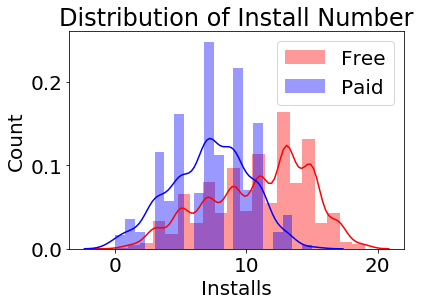

In [97]:
grid = sns.distplot(df_store['Installs_int'].loc[df_store['Type'] == "Free"], hist=True, kde=True, 
                    norm_hist=True, color='red', label='Free', bins=20)
grid = sns.distplot(df_store['Installs_int'].loc[df_store['Type'] == "Paid"], hist=True, kde=True, 
                    norm_hist=True, color='blue', label='Paid', bins=20)
plt.xlabel('Installs')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Install Number')

print(df_store['Installs_int'].loc[df_store['Type'] == "Free"].mean())
print(df_store['Installs_int'].loc[df_store['Type'] == "Paid"].mean())
print(Installs_mapping)

Text(0.5, 1.0, 'Count of Gender with Lunch')

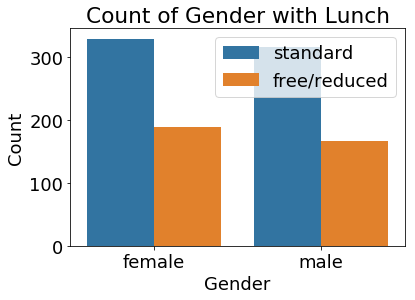

In [44]:
sns.countplot(x='gender', hue='lunch', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(loc=1)
plt.title('Count of Gender with Lunch')

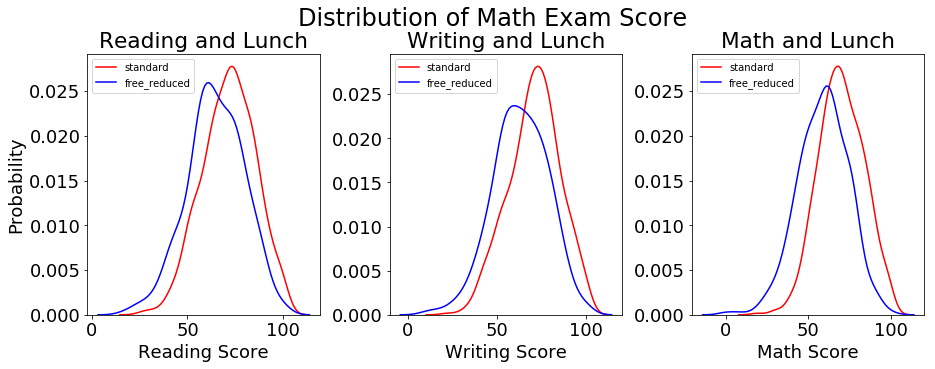

In [90]:
fig = plt.figure(figsize=(15,5))
title = fig.suptitle("Relation between Score and Lunch", fontsize=24)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,3,1) 
sns.distplot(df['reading score'].loc[df['lunch'] == "standard"], hist=False, norm_hist=False, color='red', label='standard', ax=ax1)
sns.distplot(df['reading score'].loc[df['lunch'] != "standard"], hist=False, norm_hist=False, color='blue', label='free_reduced', ax=ax1)
ax1.set_title("Reading and Lunch")
ax1.set_xlabel("Reading Score")
ax1.set_ylabel("Probability")
ax1.legend(loc=2, fontsize=10)

ax2 = fig.add_subplot(1,3,2) 
sns.distplot(df['writing score'].loc[df['lunch'] == "standard"], hist=False, norm_hist=False, color='red', label='standard', ax=ax2)
sns.distplot(df['writing score'].loc[df['lunch'] != "standard"], hist=False, norm_hist=False, color='blue', label='free_reduced', ax=ax2)
ax2.set_title("Writing and Lunch")
ax2.set_xlabel("Writing Score")
#ax2.set_ylabel("Probability")
ax2.legend(loc=2, fontsize=10)

ax3 = fig.add_subplot(1,3,3)
sns.distplot(df['math score'].loc[df['lunch'] == "standard"], hist=False, norm_hist=False, color='red', label='standard', ax=ax3)
sns.distplot(df['math score'].loc[df['lunch'] != "standard"], hist=False, norm_hist=False, color='blue', label='free_reduced', ax=ax3)
ax3.set_title("Math and Lunch")
ax3.set_xlabel("Math Score")
#ax3.set_ylabel("Probability") 
ax3.legend(loc=2, fontsize=10)
